<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_12_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA.


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Check missing values
employment_mode = df["Employment"].mode()[0]
jobsat_mode = df["JobSat"].mode()[0]
remote_mode = df["RemoteWork"].mode()[0]

df["Employment"]  = df["Employment"].fillna(employment_mode)
df["JobSat"]      = df["JobSat"].fillna(jobsat_mode)
df["RemoteWork"]  = df["RemoteWork"].fillna(remote_mode)

In [4]:
df.describe()   # numeric summary

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,65437.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,7.525987
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,1.490331
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,8.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,8.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [5]:
df["Employment"].value_counts()
df["JobSat"].value_counts()
df["RemoteWork"].value_counts()

,count
RemoteWork,
"Hybrid (some remote, some in-person)",33646
Remote,20831
In-person,10960


In [6]:
clean_categories = {
    "employed full-time": "Employed full-time",
    "employed part-time": "Employed part-time",
    "independent contractor": "Independent contractor",
    "freelancer": "Freelancer",
    "self-employed": "Self-employed",
    "student": "Student",
    "not employed": "Not employed",
    "looking for work": "Looking for work",
    "not looking for work": "Not looking for work",
    "retired": "Retired",
    "i prefer not to say": "I prefer not to say"
}


#### Step 4: Analysis of Experience and Job Satisfaction


In [7]:
def split_and_clean_employment(text):
    if pd.isna(text):
        return []

    t = text.lower()
    options = []

    # Employed full-time / part-time
    if "employed, full-time" in t:
        options.append("Employed full-time")
    if "employed, part-time" in t:
        options.append("Employed part-time")

    # Contractor / freelancer / self-employed
    if "independent contractor" in t:
        options.append("Independent contractor")
    if "freelancer" in t:
        options.append("Freelancer")
    if "self-employed" in t:
        options.append("Self-employed")

    # Student (full or part-time)
    if "student" in t:
        options.append("Student")

    # Unemployed variants
    if "not employed, but looking for work" in t:
        options.append("Looking for work")
    if "not employed, and not looking for work" in t:
        options.append("Not looking for work")

    # Retired
    if "retired" in t:
        options.append("Retired")

    # Prefer not to say
    if "i prefer not to say" in t:
        options.append("I prefer not to say")

    return options


In [8]:
df["Employment_clean_list"] = df["Employment"].apply(split_and_clean_employment)
employment_exploded = df.explode("Employment_clean_list").dropna(subset=["Employment_clean_list"])


In [9]:
employment_exploded["Employment_clean_list"].value_counts()


,count
Employment_clean_list,
Employed full-time,45162
Student,11142
Independent contractor,10726
Freelancer,10726
Self-employed,10726
Employed part-time,4145
Looking for work,3954
Not looking for work,1203
Retired,681


/tmp/ipython-input-3591107429.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


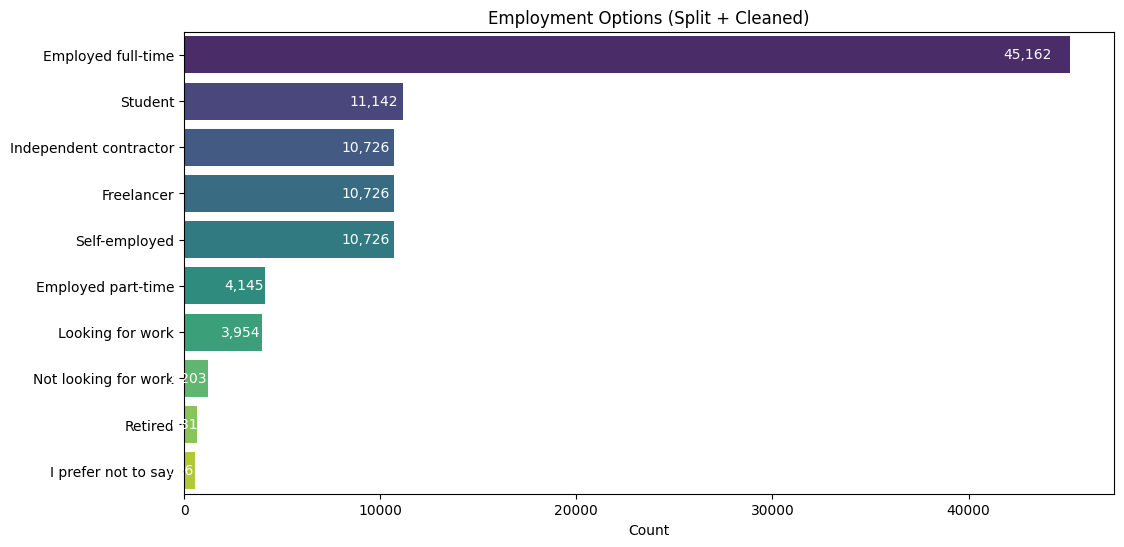

In [10]:
employment_counts = (
    employment_exploded["Employment_clean_list"]
    .value_counts()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
sorted_series = employment_counts.sort_values(ascending=False)

ax = sns.barplot(
    x=sorted_series.values,
    y=sorted_series.index,
    palette="viridis"
)

for i, v in enumerate(sorted_series.values):
    ax.text(
        v * 0.98,
        i,
        f"{int(v):,}",
        color="white",
        ha="right",
        va="center",
        fontsize=10
    )

plt.title("Employment Options (Split + Cleaned)")
plt.xlabel("Count")
plt.ylabel("")
plt.show()


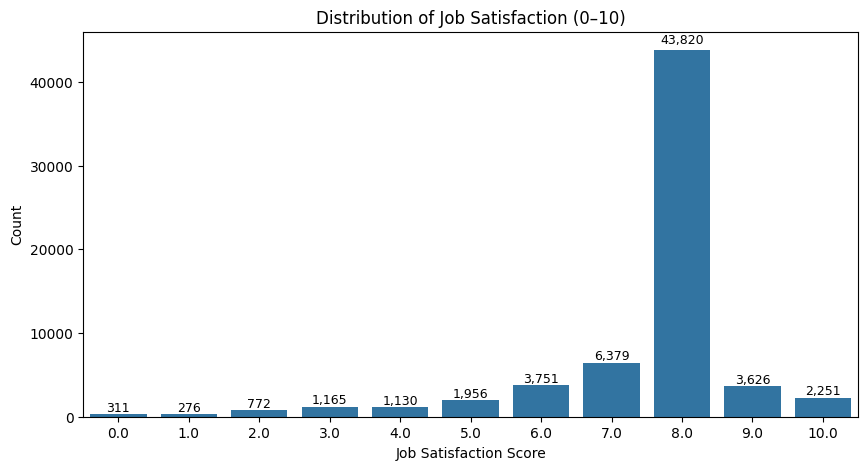

In [11]:
plt.figure(figsize=(10,5))
ax = sns.countplot(
    data=df,
    x="JobSat",
    order=sorted(df["JobSat"].unique())
)

plt.title("Distribution of Job Satisfaction (0–10)")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Count")

# Add labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # x-position: middle of the bar
        height + (height * 0.01),      # y-position: just above the bar
        f"{height:,.0f}",              # format with commas
        ha="center",
        va="bottom",
        fontsize=9,
        color="black"
    )

plt.show()

In [12]:
def clean_years(value):
    if pd.isna(value):
        return None
    if value == "Less than 1 year":
        return 0
    if value == "More than 50 years":
        return 50
    try:
        return float(value)
    except:
        return None

df["YearsCodePro_clean"] = df["YearsCodePro"].apply(clean_years)


In [13]:
bins = [0,5,10,20,60]
labels = ["0–5","5–10","10–20","20+"]

df["ExperienceRange"] = pd.cut(df["YearsCodePro_clean"], bins=bins, labels=labels, right=False)


/tmp/ipython-input-757888950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_df = df.groupby("ExperienceRange")["JobSat"].median().reset_index()
/tmp/ipython-input-757888950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


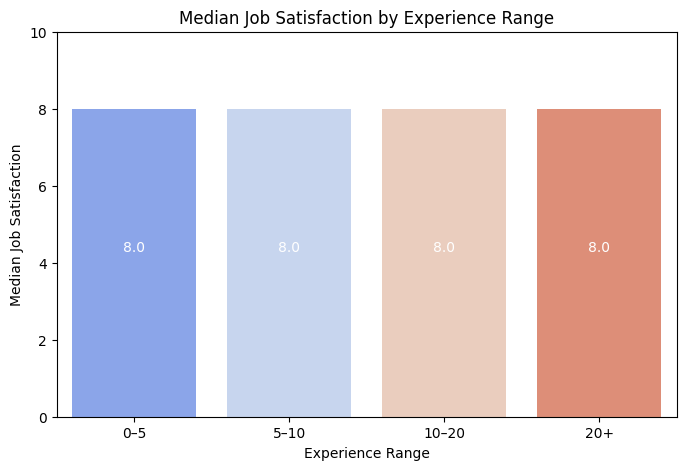

In [14]:
median_df = df.groupby("ExperienceRange")["JobSat"].median().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=median_df,
    x="ExperienceRange",
    y="JobSat",
    palette="coolwarm"
)

# Add labels inside each bar (decimal, centered up)
for i, row in median_df.iterrows():
    value = row["JobSat"]
    ax.text(
        i,                                  # x-position = bar index
        value * 0.55,                       # y-position = slightly above center
        f"{value:.1f}",                     # label = one decimal
        color="white",
        ha="center",
        va="center",
        fontsize=10
    )

plt.title("Median Job Satisfaction by Experience Range")
plt.ylim(0,10)
plt.xlabel("Experience Range")
plt.ylabel("Median Job Satisfaction")
plt.show()

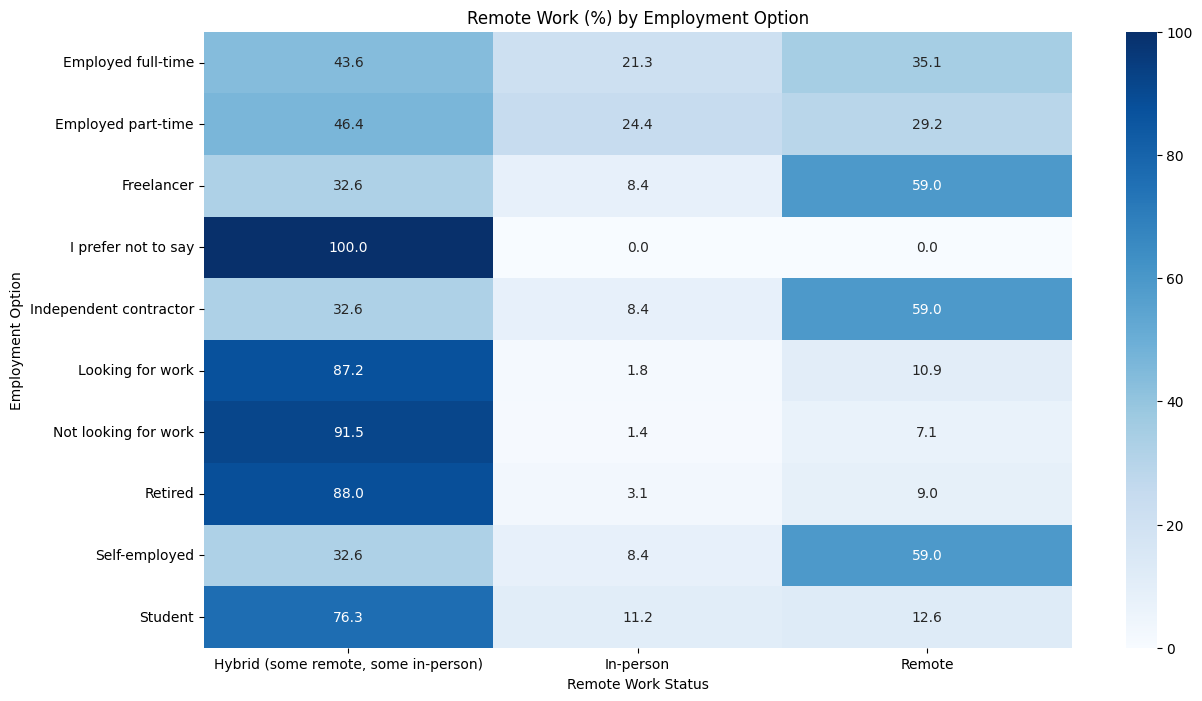

In [15]:
remote_by_clean_employment = pd.crosstab(
    employment_exploded["Employment_clean_list"],
    employment_exploded["RemoteWork"],
    normalize="index"
) * 100

plt.figure(figsize=(14,8))
sns.heatmap(remote_by_clean_employment, annot=True, fmt=".1f", cmap="Blues")
plt.title("Remote Work (%) by Employment Option")
plt.xlabel("Remote Work Status")
plt.ylabel("Employment Option")
plt.show()


In [16]:
lang_df = df.dropna(subset=["LanguageHaveWorkedWith"]).copy()
lang_df["LanguageList"] = lang_df["LanguageHaveWorkedWith"].str.split(";")
lang_exploded = lang_df.explode("LanguageList")
lang_exploded["LanguageList"] = lang_exploded["LanguageList"].str.strip()

global_lang_counts = (
    lang_exploded["LanguageList"]
    .value_counts()
    .head(15)
)


/tmp/ipython-input-4182292872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


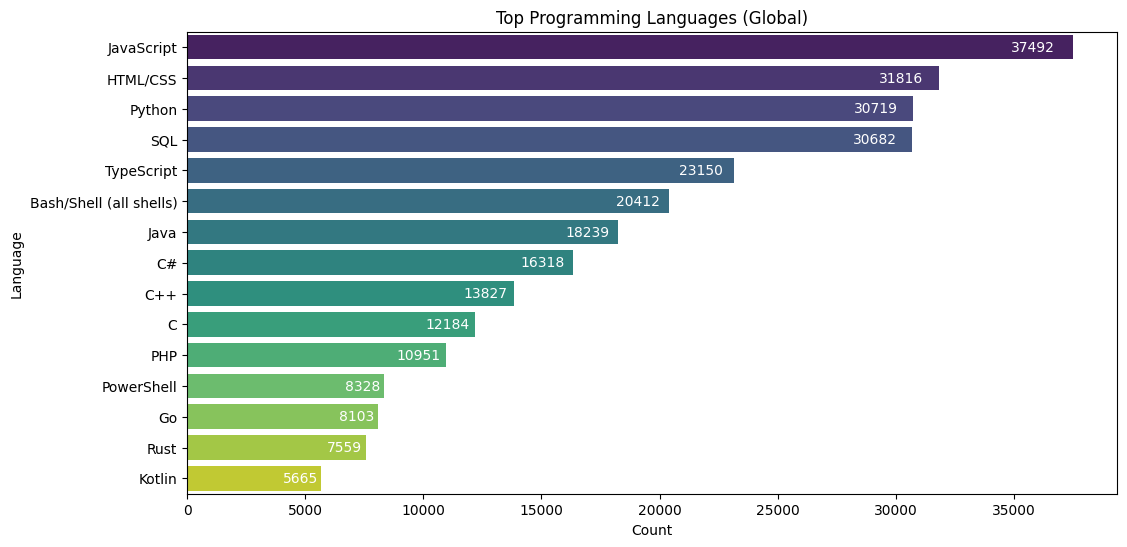

In [17]:
plt.figure(figsize=(12,6))
ax = sns.barplot(
    y=global_lang_counts.index,
    x=global_lang_counts.values,
    palette="viridis"
)

for i, v in enumerate(global_lang_counts.values):
    ax.text(v-(v*0.02), i, str(int(v)), color="white", va="center", ha="right")

plt.title("Top Programming Languages (Global)")
plt.xlabel("Count")
plt.ylabel("Language")
plt.show()


In [18]:
df["EdLevel_clean"] = df["EdLevel"].str.replace(r"\(.*?\)", "", regex=True).str.strip()

def split_edlevel(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = text.replace(" or ", ", ").replace(" and ", ", ")
    return [p.strip().title() for p in text.split(",") if p.strip()]

df["EdLevel_clean_list"] = df["EdLevel_clean"].apply(split_edlevel)
edlevel_exploded = df.explode("EdLevel_clean_list").dropna(subset=["EdLevel_clean_list"])


In [19]:
merged = employment_exploded.merge(
    edlevel_exploded[["ResponseId","EdLevel_clean_list"]],
    on="ResponseId",
    how="inner"
)


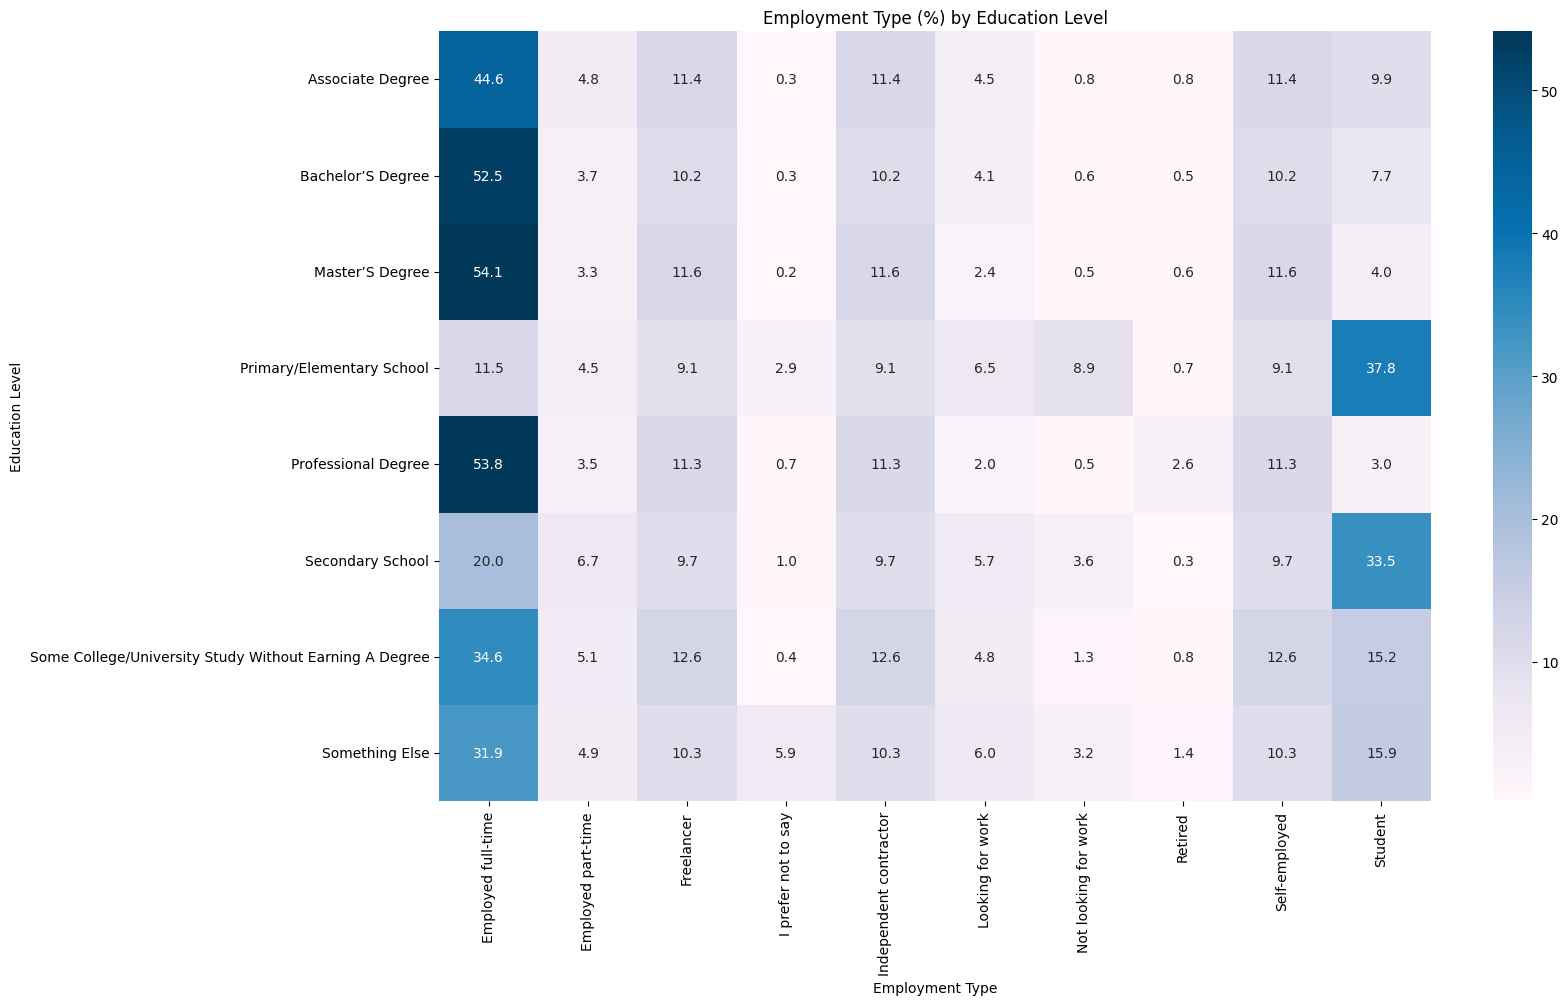

In [20]:
heatmap_table = pd.crosstab(
    merged["EdLevel_clean_list"],
    merged["Employment_clean_list"],
    normalize="index"
) * 100

plt.figure(figsize=(16,10))
sns.heatmap(heatmap_table, cmap="PuBu", annot=True, fmt=".1f")
plt.title("Employment Type (%) by Education Level")
plt.xlabel("Employment Type")
plt.ylabel("Education Level")
plt.show()


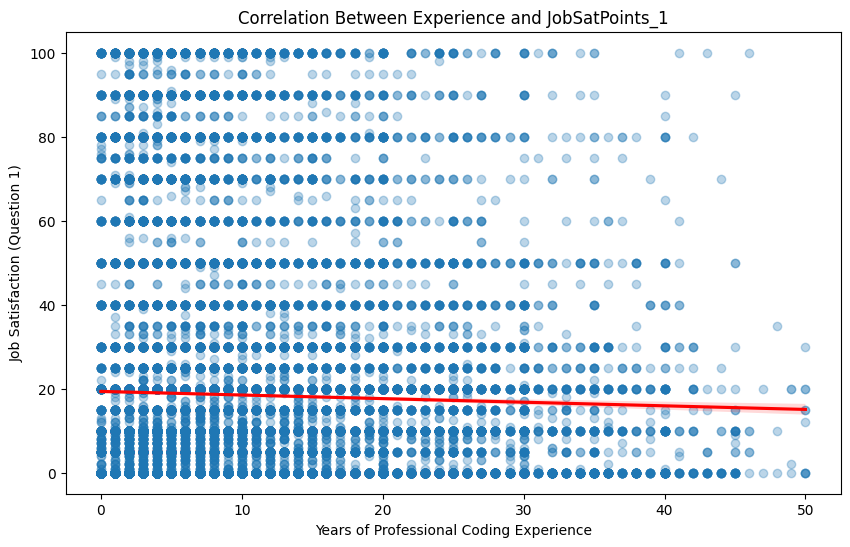

,YearsCodePro_clean,JobSatPoints_1
YearsCodePro_clean,1.000000,-0.028244
JobSatPoints_1,-0.028244,1.000000


In [21]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x="YearsCodePro_clean",
    y="JobSatPoints_1",
    scatter_kws={"alpha":0.3},
    line_kws={"color":"red"}
)
plt.title("Correlation Between Experience and JobSatPoints_1")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction (Question 1)")
plt.show()

df[["YearsCodePro_clean","JobSatPoints_1"]].corr()


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [22]:
## Write your code here
# Clean the YearsCodePro column
def clean_years(value):
    if pd.isna(value):
        return None
    if value == "Less than 1 year":
        return 0
    if value == "More than 50 years":
        return 50
    try:
        return float(value)
    except:
        return None

df["YearsCodePro_clean"] = df["YearsCodePro"].apply(clean_years)

In [23]:
bins = [0, 5, 10, 20, 60]
labels = ["0–5", "5–10", "10–20", "20+"]

df["ExperienceRange"] = pd.cut(
    df["YearsCodePro_clean"],
    bins=bins,
    labels=labels,
    right=False
)


/tmp/ipython-input-652233346.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("ExperienceRange")["JobSat"]
/tmp/ipython-input-652233346.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


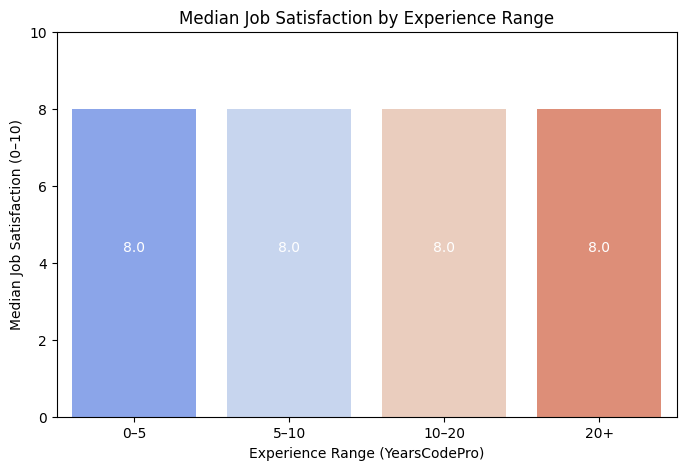

In [24]:
# Compute median JobSat for each experience group
median_df = (
    df.groupby("ExperienceRange")["JobSat"]
      .median()
      .reset_index()
)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=median_df,
    x="ExperienceRange",
    y="JobSat",
    palette="coolwarm"
)

# Add labels INSIDE bars (one decimal, slightly above center)
for i, row in median_df.iterrows():
    value = row["JobSat"]
    ax.text(
        i,                  # x position (bar index)
        value * 0.55,       # y position (inside, a bit above center)
        f"{value:.1f}",     # label with 1 decimal
        color="white",
        ha="center",
        va="center",
        fontsize=10
    )

plt.title("Median Job Satisfaction by Experience Range")
plt.ylim(0, 10)
plt.xlabel("Experience Range (YearsCodePro)")
plt.ylabel("Median Job Satisfaction (0–10)")
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


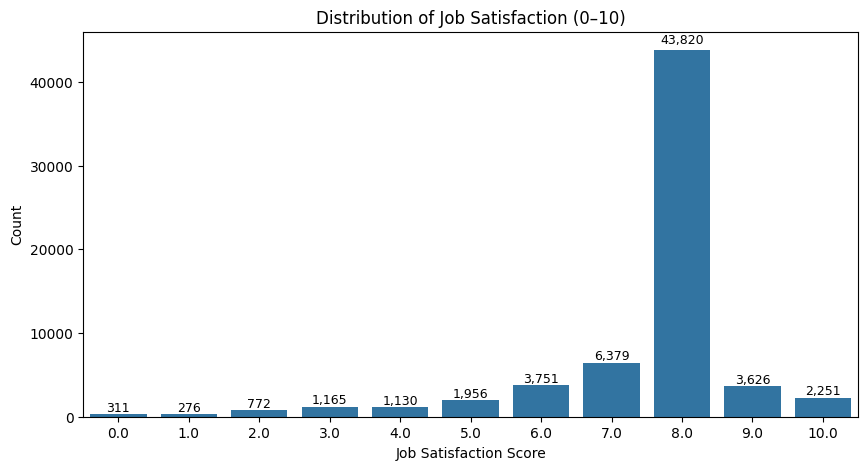

In [25]:
plt.figure(figsize=(10,5))
ax = sns.countplot(
    data=df,
    x="JobSat",
    order=sorted(df["JobSat"].unique())
)

plt.title("Distribution of Job Satisfaction (0–10)")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Count")

# Add labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # x-position: middle of the bar
        height + (height * 0.01),      # y-position: just above the bar
        f"{height:,.0f}",              # format with commas
        ha="center",
        va="bottom",
        fontsize=9,
        color="black"
    )

plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


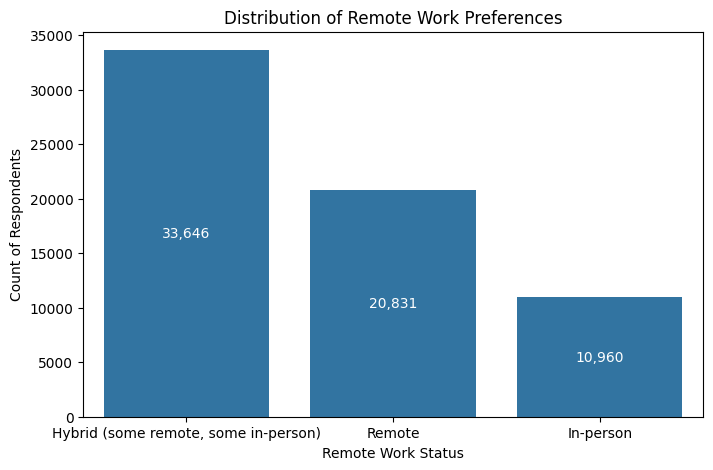

In [26]:
plt.figure(figsize=(8,5))

# Assign the plot to ax
ax = sns.countplot(
    data=df,
    x="RemoteWork",
    order=df["RemoteWork"].value_counts().index
)

plt.title("Distribution of Remote Work Preferences")
plt.xlabel("Remote Work Status")
plt.ylabel("Count of Respondents")
plt.xticks(rotation=0)

# Add labels *inside* the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # center of the bar
        height * 0.5,                  # halfway up the bar
        f"{height:,.0f}",              # comma formatted count
        ha="center",
        va="center",
        fontsize=10,
        color="white"                  # inside = white
    )

plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [27]:
## Write your code here
# Drop rows where languages are missing
lang_df = df.dropna(subset=["LanguageHaveWorkedWith"]).copy()

# Split the string into a list
lang_df["LanguageList"] = lang_df["LanguageHaveWorkedWith"].str.split(";")

# Explode into multiple rows (one language per row)
lang_exploded = lang_df.explode("LanguageList")

# Remove leading/trailing spaces
lang_exploded["LanguageList"] = lang_exploded["LanguageList"].str.strip()

lang_exploded.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Employment_clean_list,YearsCodePro_clean,ExperienceRange,EdLevel_clean,EdLevel_clean_list,LanguageList
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,8.0,[Employed full-time],17.0,10–20,Bachelor’s degree,[Bachelor’S Degree],Bash/Shell (all shells)
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Deve

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [28]:
## Write your code here
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'Employment_clean_list', 'YearsCodePro_clean',
       'ExperienceRange', 'EdLevel_clean', 'EdLevel_clean_list'],
      dtype='object', length=119)

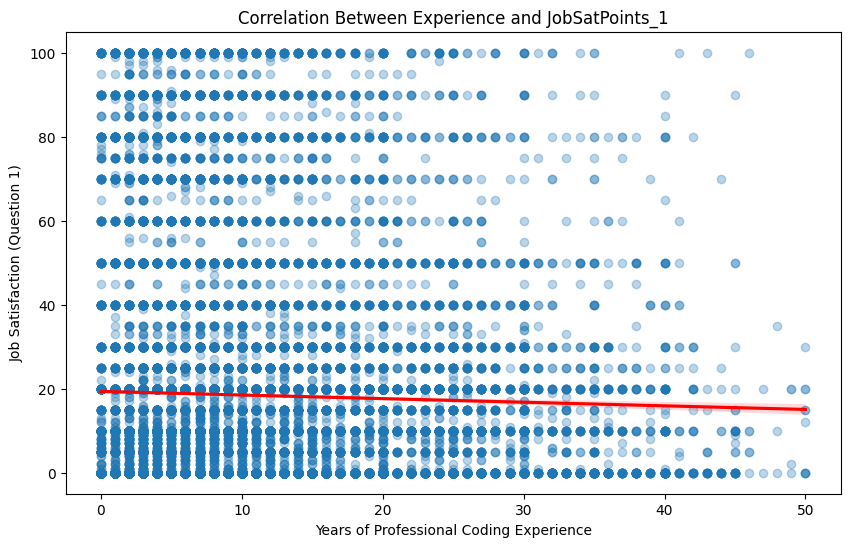

,YearsCodePro_clean,JobSatPoints_1
YearsCodePro_clean,1.000000,-0.028244
JobSatPoints_1,-0.028244,1.000000


In [29]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x="YearsCodePro_clean",
    y="JobSatPoints_1",
    scatter_kws={"alpha":0.3},
    line_kws={"color":"red"}
)
plt.title("Correlation Between Experience and JobSatPoints_1")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction (Question 1)")
plt.show()

df[["YearsCodePro_clean","JobSatPoints_1"]].corr()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [30]:
## Write your code here
# Count how many respondents in each education level
ed_counts = df["EdLevel"].value_counts()
ed_counts


,count
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24942
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15557
Some college/university study without earning a degree,7651
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",5793
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2970
"Associate degree (A.A., A.S., etc.)",1793
Primary/elementary school,1146
Something else,932


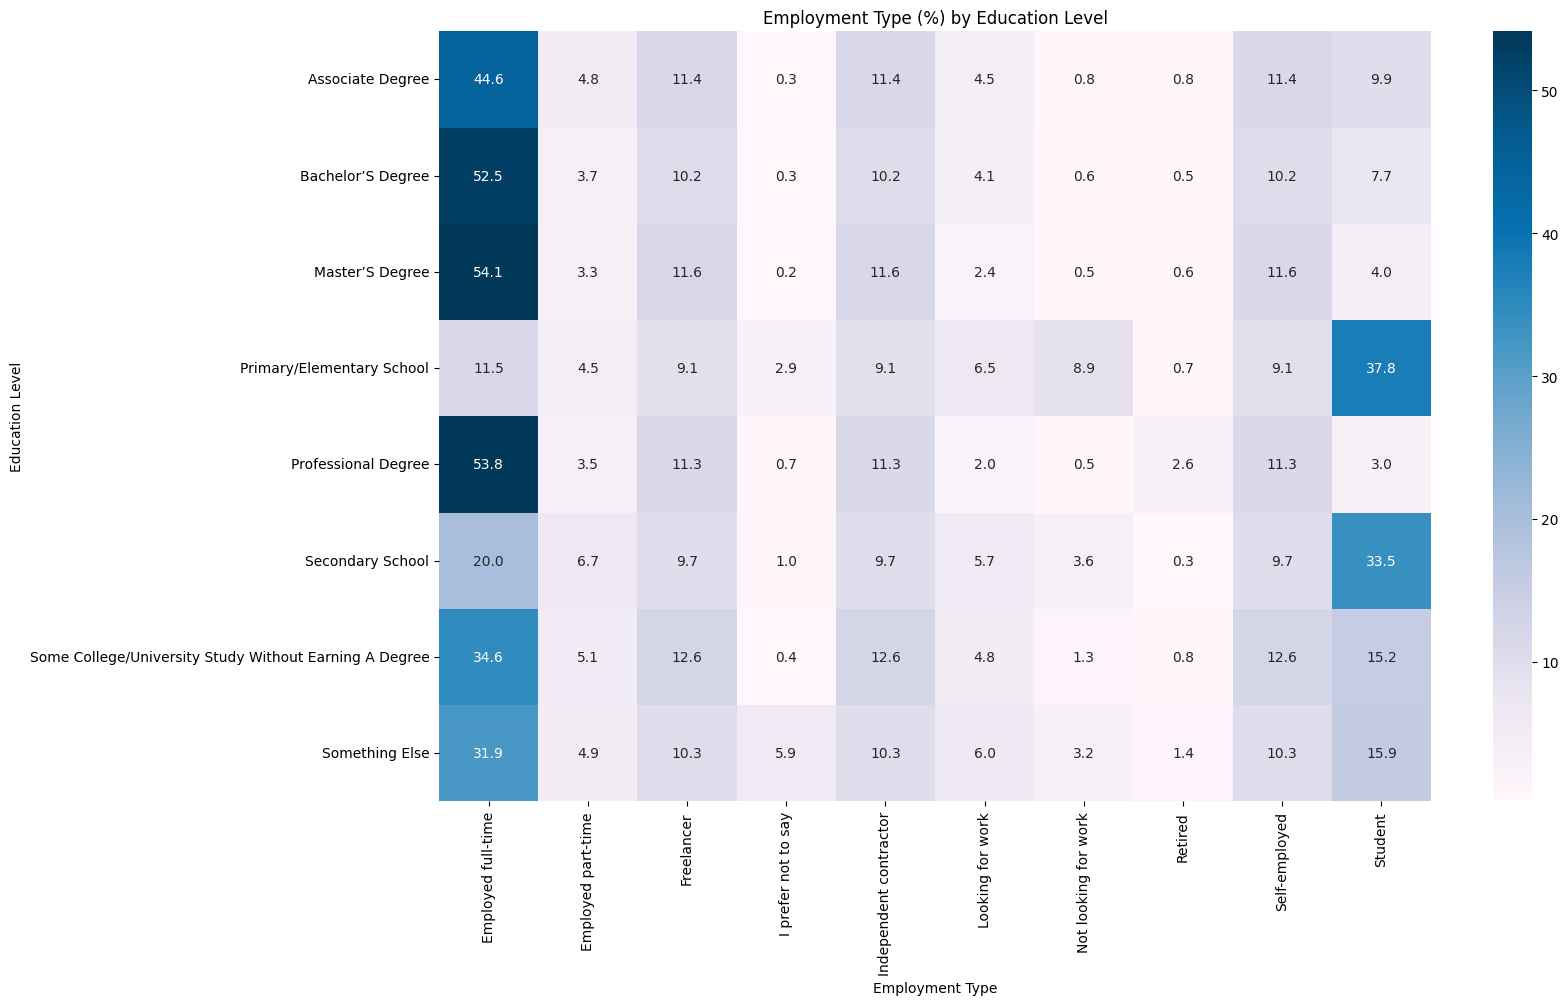

In [31]:
heatmap_table = pd.crosstab(
    merged["EdLevel_clean_list"],
    merged["Employment_clean_list"],
    normalize="index"
) * 100

plt.figure(figsize=(16,10))
sns.heatmap(heatmap_table, cmap="PuBu", annot=True, fmt=".1f")
plt.title("Employment Type (%) by Education Level")
plt.xlabel("Employment Type")
plt.ylabel("Education Level")
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [32]:
## Write your code here
df.to_csv("EDA_output.csv", index=False)

In [33]:
import os
os.listdir()

['.config', 'EDA_output.csv', 'sample_data']

In [34]:
from google.colab import files
files.download("EDA_output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
